# Analysis of indian startup funding

## Possible questions which could be answered are:

•How does the funding ecosystem change with time? 
 
•Do cities play a major role in funding?

•Which industries are favored by investors for funding?

•Who are the important investors in the Indian Ecosystem?

•How much funds does startups generally get in India?

In [356]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

## Getting Data

In [314]:
data = pd.read_csv("startup_funding.csv")
data = pd.DataFrame(data)
#data.set_index('SNo',inplace=True)
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [315]:
data.columns  #Column Names

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks'],
      dtype='object')

In [316]:
# data.iloc[2357:2367]

In [317]:
data['Date'] = data['Date'].str.replace("\W{2,6}", "/")
data['Date'] = data['Date'].str.replace(".", "/")
data.iloc[2357:2367]

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2357,2357,22/01/2015,Corporate360,NaN,NaN,NaN,Group of Angel Investors,Seed Funding,"200,000",NaN
2358,2358,22/01/2015,Freshmonk,NaN,NaN,NaN,"August Capital Partners, Michael Blakey",Seed Funding,NaN,NaN
2359,2359,22/01/2015,Englishleap.com,NaN,NaN,NaN,ANALEC,Private Equity,NaN,Majority Stake
2360,2360,22/01/2015,Antuit,NaN,NaN,NaN,"Goldman Sachs, Zodius Capital",Private Equity,"56,000,000",NaN
2361,2361,22/01/2015,Caratlane.com,NaN,NaN,NaN,Tiger Global,Private Equity,"31,000,000",Series D
2362,2362,24/01/2015,Aasaanjobs,NaN,NaN,NaN,"Inventus Capital Partners, IDG Ventures",Seed Funding,"1,500,000",NaN
2363,2363,24/01/2015,Impartus,NaN,NaN,NaN,Kaizen Private Equity,Private Equity,NaN,Series A
2364,2364,25/01/2015,Thrill App,NaN,NaN,NaN,People Group (Shaadi.com),Private Equity,"1,000,000",Strategic Funding
2365,2365,27/01/2015,CarDekho.com,NaN,NaN,NaN,"Hillhouse Capital, Tybourne Capital",Private Equity,"50,000,000",Series B
2366,2366,28/01/2015,Grabhouse.com,NaN,NaN,NaN,"Kalaari Capital, Sequoia Capital",Private Equity,"2,500,000",Series A


In [318]:
data.shape

(2372, 10)

In [319]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
SNo                 2372 non-null int64
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null object
AmountInUSD         1525 non-null object
Remarks             419 non-null object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


In [320]:
total = data.isnull().sum()
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.DataFrame([total,percent],index = ['total','percent']).T
missing_data

,total,percent
SNo,0.0,0.000000
Date,0.0,0.000000
StartupName,0.0,0.000000
IndustryVertical,171.0,0.072091
SubVertical,936.0,0.394604
CityLocation,179.0,0.075464
InvestorsName,8.0,0.003373
InvestmentType,1.0,0.000422
AmountInUSD,847.0,0.357083
Remarks,1953.0,0.823356


Deleting "Remarks" from table and displaying remaining data

In [321]:
del data["Remarks"]

In [322]:
data.head(6)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000"
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000"
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000"


Cleaning AmountInUSD column

In [323]:
data['AmountInUSD'] = pd.to_numeric(data['AmountInUSD'].str.replace(",", ""))


In [324]:
data['AmountInUSD'].sample(6)

1659      2500000.0
1938     10000000.0
1889            NaN
1670     25000000.0
1175      8000000.0
1368    145000000.0
Name: AmountInUSD, dtype: float64

In [325]:
data['Date'] = data['Date'].str.replace("\W{2,6}", "/")
data['Date'] = pd.to_datetime(data['Date'].str.replace(".", "/"))


Number of fundings per month from 2015 to 2017

In [326]:
data.index = data['Date']
data.tail()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
Date,,,,,,,,,
2015-01-29,2367,2015-01-29,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,4500000.0
2015-01-29,2368,2015-01-29,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,825000.0
2015-01-30,2369,2015-01-30,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000.0
2015-01-30,2370,2015-01-30,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN
2015-01-31,2371,2015-01-31,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,140000.0


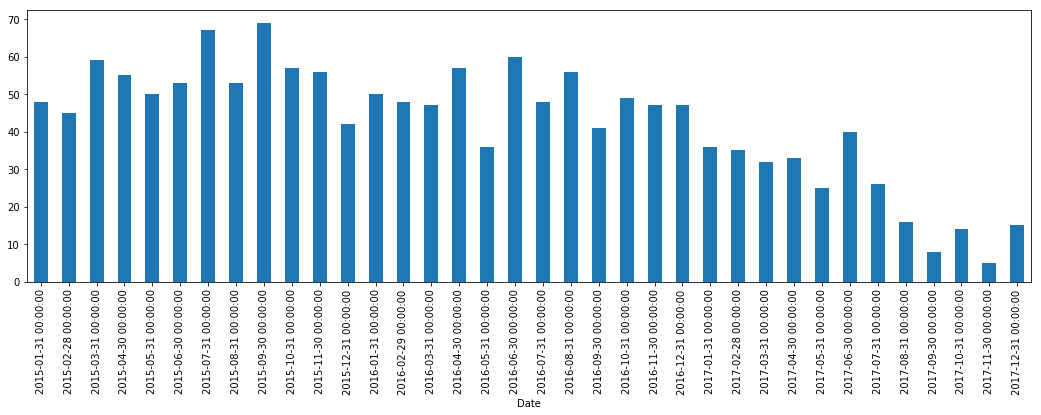

In [327]:
df= pd.DataFrame(data.AmountInUSD)
df.dropna(inplace=True)
df =df.resample('M').count()
plt.figure(figsize=(18,5)) 
df['AmountInUSD'].plot(kind='bar')

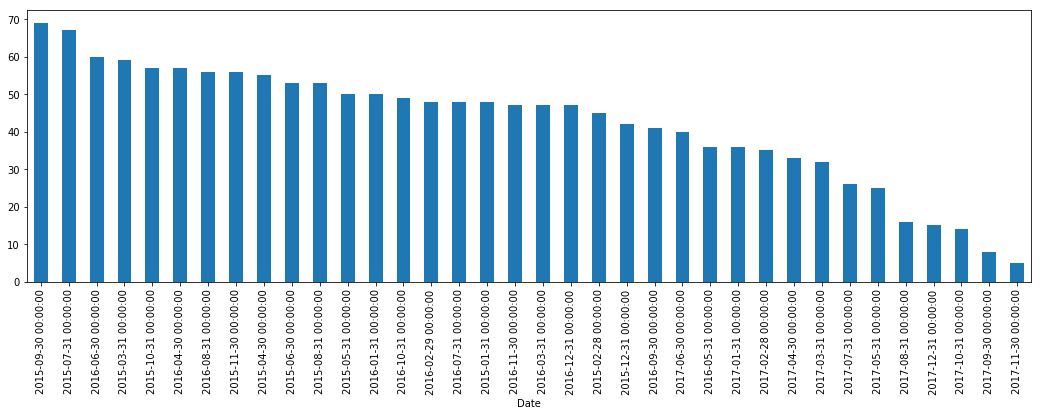

In [328]:
plt.figure(figsize=(18,5)) 
df['AmountInUSD'].sort_values(ascending = False).plot(kind='bar')

In [329]:
df['AmountInUSD'].sort_values(ascending = False)

Date
2015-09-30    69
2015-07-31    67
2016-06-30    60
2015-03-31    59
2015-10-31    57
2016-04-30    57
2016-08-31    56
2015-11-30    56
2015-04-30    55
2015-06-30    53
2015-08-31    53
2015-05-31    50
2016-01-31    50
2016-10-31    49
2016-02-29    48
2016-07-31    48
2015-01-31    48
2016-11-30    47
2016-03-31    47
2016-12-31    47
2015-02-28    45
2015-12-31    42
2016-09-30    41
2017-06-30    40
2016-05-31    36
2017-01-31    36
2017-02-28    35
2017-04-30    33
2017-03-31    32
2017-07-31    26
2017-05-31    25
2017-08-31    16
2017-12-31    15
2017-10-31    14
2017-09-30     8
2017-11-30     5
Name: AmountInUSD, dtype: int64

As we can see that startups got more funding in September 2015(Total funding in September 2015 are 69). Above visualization shows how funding varies from one month to another.


maximum funding, minimum funding , average funding

In [330]:
print("Maximum funding to a Startups is : ",data["AmountInUSD"].dropna().sort_values().max())

Maximum funding to a Startups is :  1400000000.0


In [331]:
data[data.AmountInUSD == 1400000000.0]

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
Date,,,,,,,,,
2017-05-18,158,2017-05-18,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09
2017-03-21,294,2017-03-21,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09


In [332]:
data[data.StartupName == 'Paytm']

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
Date,,,,,,,,,
2017-05-18,158,2017-05-18,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09
2016-08-30,821,2016-08-30,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07
2015-09-29,1787,2015-09-29,Paytm,E-Commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08
2015-03-13,2218,2015-03-13,Paytm,NaN,NaN,NaN,Ratan Tata,Private Equity,NaN
2015-05-02,2276,2015-05-02,Paytm,NaN,NaN,NaN,Ant Financial Services (Alipay),Private Equity,NaN


Data shows Paytm and Flipkart got maximum funding of 1400000000 USD

In [333]:
print("Minimum funding to a Startups is : ",data["AmountInUSD"].dropna().sort_values().min())

Minimum funding to a Startups is :  16000.0


In [338]:
data[data.AmountInUSD == 16000.0]

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
Date,,,,,,,,,
2015-01-19,2345,2015-01-19,Hostel Dunia,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2015-01-19,2346,2015-01-19,Play your sport,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2015-01-19,2347,2015-01-19,Yo Grad,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2015-01-19,2348,2015-01-19,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
2015-01-19,2349,2015-01-19,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0


Data shows Hostel Dunia, Play your sport, Yo Grad, Enabli and CBS are least funded Startups i.e, 16000 USD

In [340]:
print("On Average indian startups got funding of : ",data["AmountInUSD"].dropna().sort_values().mean())

On Average indian startups got funding of :  12031073.099016393


In [351]:
data = data[np.isfinite(data['AmountInUSD'])]
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1525 entries, 2017-01-08 to 2015-01-31
Data columns (total 9 columns):
SNo                 1525 non-null int64
Date                1525 non-null datetime64[ns]
StartupName         1525 non-null object
IndustryVertical    1394 non-null object
SubVertical         871 non-null object
CityLocation        1390 non-null object
InvestorsName       1520 non-null object
InvestmentType      1525 non-null object
AmountInUSD         1525 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 119.1+ KB


In [352]:
print("Total startups funded : ", len(data["StartupName"].unique()))

Total startups funded :  1320


In [355]:
print(data["StartupName"].value_counts().head(10))
startupname = data['StartupName'].value_counts().head(20)

Swiggy           7
UrbanClap        5
Voonik           4
Medinfi          4
Ola              4
Jugnoo           4
Flipkart         4
Capital Float    4
Delhivery        3
LendingKart      3
Name: StartupName, dtype: int64


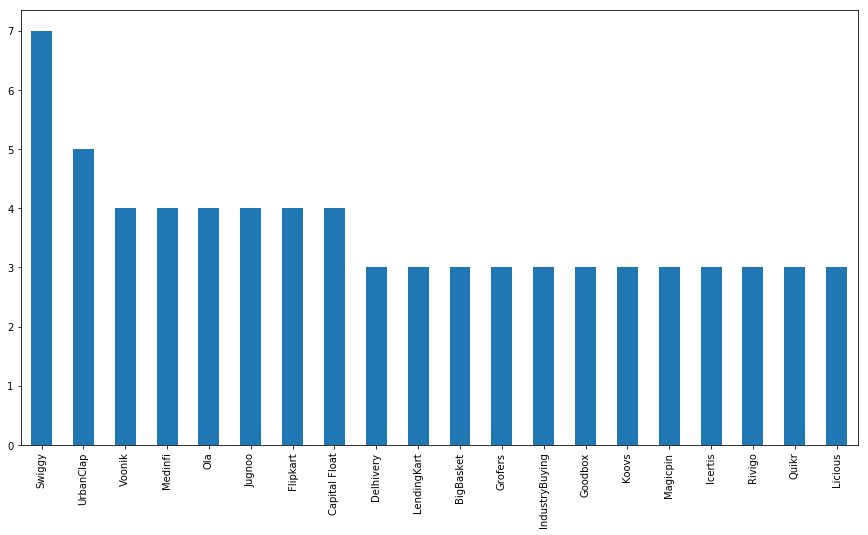

In [359]:
plt.figure(figsize=(15,8))
startupname.plot(kind='bar')

Industries favored by investors for funding

In [363]:
industry = data['IndustryVertical'].value_counts().head(10)
print(industry)


Consumer Internet       461
Technology              189
eCommerce               113
ECommerce                32
Logistics                16
Education                15
Healthcare               14
Food & Beverage          12
Finance                   7
Online Food Delivery      5
Name: IndustryVertical, dtype: int64


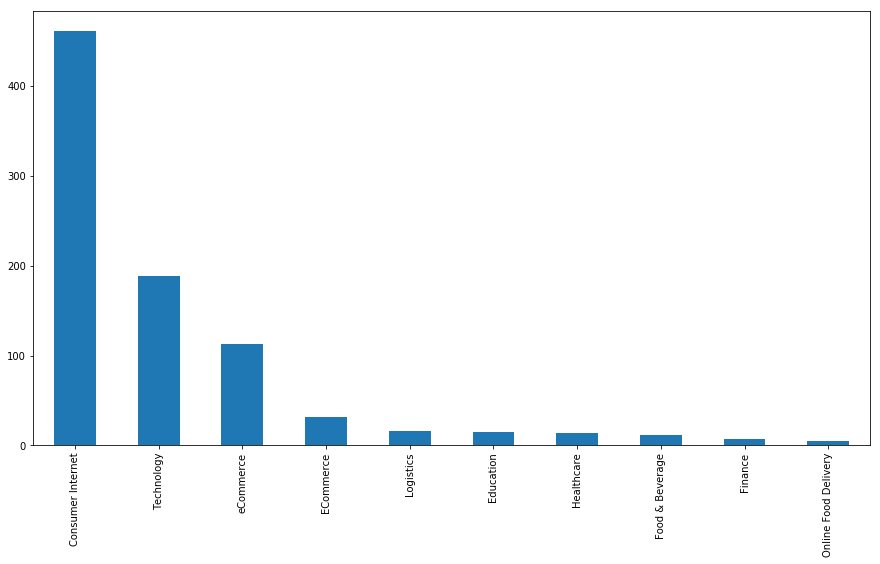

In [364]:
plt.figure(figsize=(15,8))
industry.plot(kind='bar')

In [365]:
industry = data['SubVertical'].value_counts().head(10)
print(industry)

Food Delivery Platform                4
Online Pharmacy                       4
Online lending platform               4
Online Learning Platform              3
ECommerce Marketplace                 3
Online Women’s Fashion Marketplace    2
Medical Supplies eTailer              2
ECommerce SAAS Solutions              2
Online fashion marketplace            2
Online Furniture Store                2
Name: SubVertical, dtype: int64


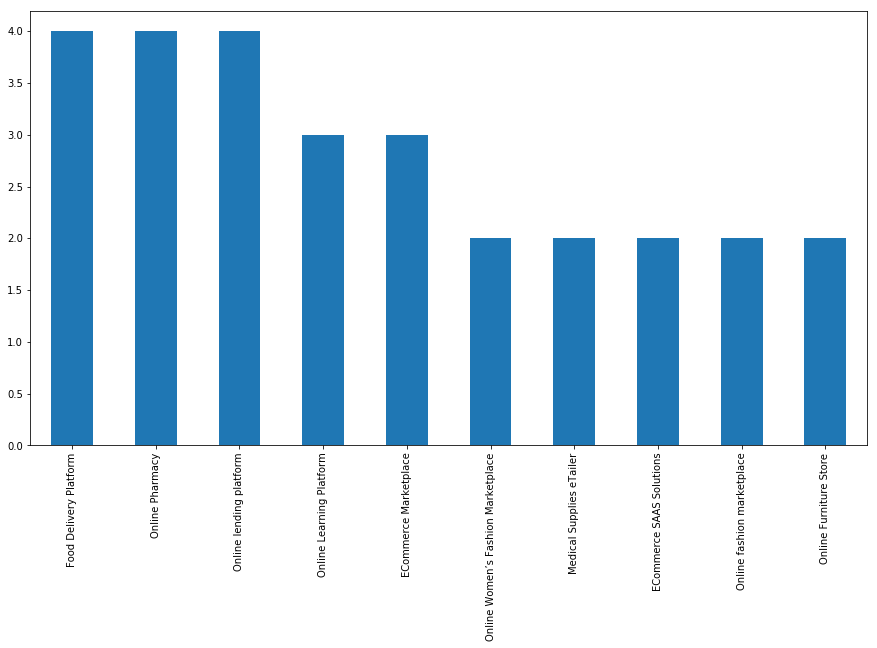

In [366]:
plt.figure(figsize=(15,8))
industry.plot(kind='bar')

Do cities play a major role in funding ? (OR) Which city has maximum startups ?

In [367]:
city = data['CityLocation'].value_counts().head(10)
print(city)

Bangalore    405
Mumbai       300
New Delhi    212
Gurgaon      165
Pune          54
Hyderabad     53
Chennai       47
Noida         45
Ahmedabad     25
Jaipur        10
Name: CityLocation, dtype: int64


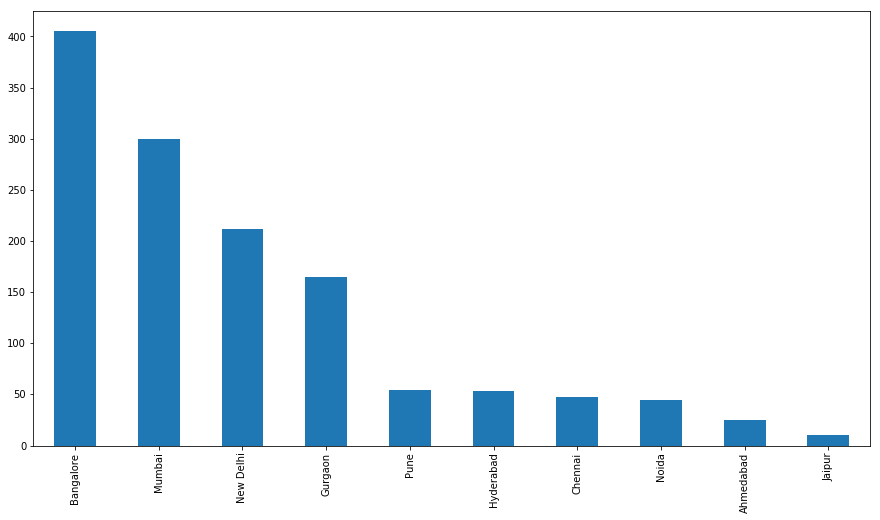

In [368]:
plt.figure(figsize=(15,8))
city.plot(kind='bar')

Distribution of startups across Top different cities

Text(0.5, 1.0, 'Distribution of Startups across Top cities')

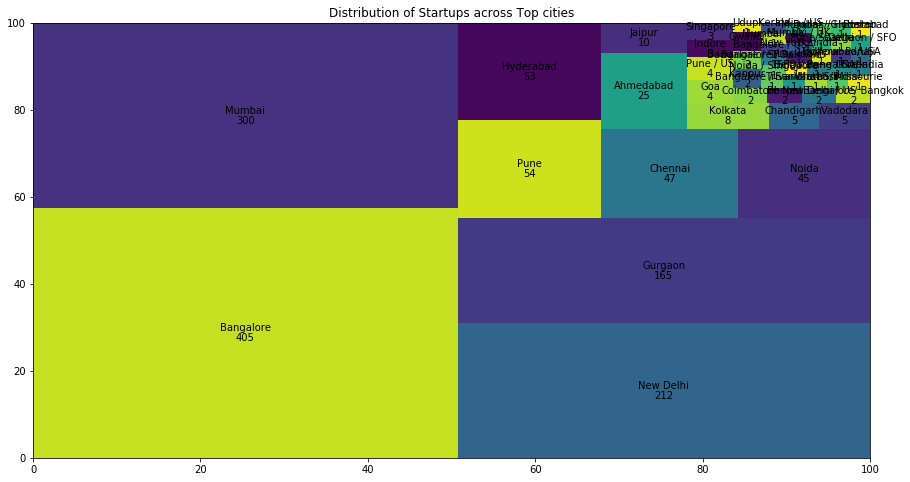

In [371]:
import squarify
plt.figure(figsize=(15,8))
count = data['CityLocation'].value_counts()
squarify.plot(sizes=count.values,label=count.index, value=count.values)
plt.title('Distribution of Startups across Top cities')

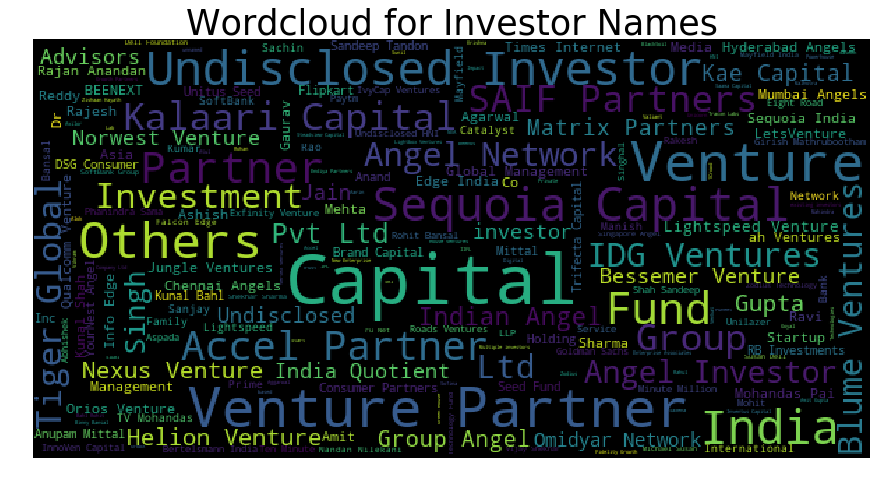

In [373]:
from wordcloud import WordCloud

names = data["InvestorsName"][~pd.isnull(data["InvestorsName"])]
#print(names)
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor Names", fontsize=35)
plt.axis("off")
plt.show()

In [395]:
investors = data['InvestorsName'].value_counts().head(15)
investors = investors.iloc[2:]
print(investors)

Group of Angel Investors    14
Kalaari Capital             13
Sequoia Capital             12
Indian Angel Network        12
undisclosed investors       11
SAIF Partners                9
Undisclosed Investor         8
Info Edge (India) Ltd        8
Undisclosed                  8
Tiger Global                 7
Brand Capital                7
Undisclosed investor         7
Trifecta Capital             6
Name: InvestorsName, dtype: int64


In [387]:
data.groupby('InvestorsName')["AmountInUSD"].count().sort_values(ascending = False)

InvestorsName
Undisclosed Investors                                                                                           24
Undisclosed investors                                                                                           21
Group of Angel Investors                                                                                        14
Kalaari Capital                                                                                                 13
Indian Angel Network                                                                                            12
Sequoia Capital                                                                                                 12
undisclosed investors                                                                                           11
SAIF Partners                                                                                                    9
Undisclosed                                                       

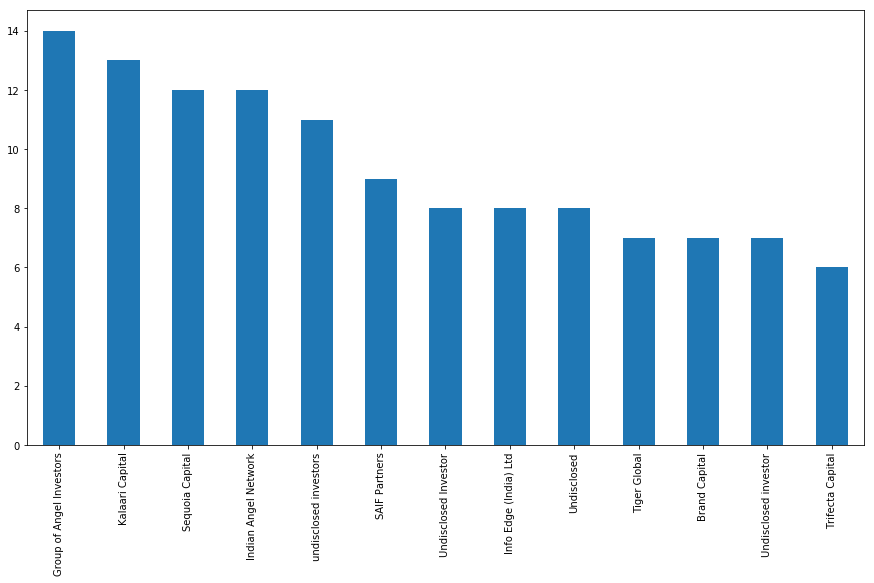

In [396]:
plt.figure(figsize=(15,8))
investors.plot(kind='bar')


In [397]:
investment = data['InvestmentType'].value_counts()
print(investment)

Private Equity    827
Seed Funding      672
SeedFunding        22
PrivateEquity       1
Crowd funding       1
Debt Funding        1
Crowd Funding       1
Name: InvestmentType, dtype: int64


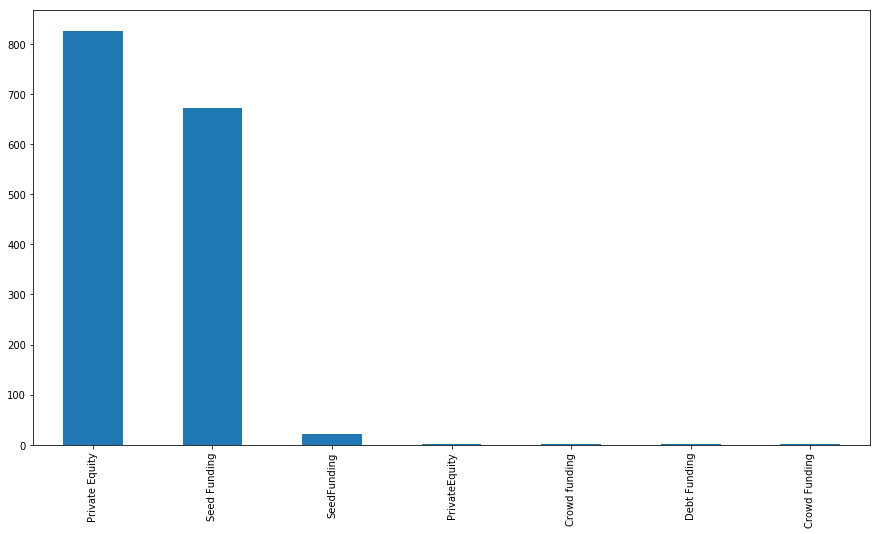

In [401]:
plt.figure(figsize=(15,8))
investment.plot(kind='bar')

In [448]:
data["InvestmentType"].value_counts()
# data['InvestmentType'] = data['InvestmentType'].str.replace("SeedFunding", "Seed Funding")
# data['InvestmentType'] = data['InvestmentType'].str.replace("PrivateEquity", "Private Equity")
data = data.replace({'InvestmentType' : { 'SeedFunding' : "Seed Funding", 'PrivateEquity' : "Private Equity", 'Crowd funding' : "Crowd Funding" }})

In [452]:
temp = data["InvestmentType"].value_counts()
labels = temp.index
sizes = ((temp / temp.sum())*100).head(2)
sizes


Private Equity    54.295082
Seed Funding      45.508197
Name: InvestmentType, dtype: float64

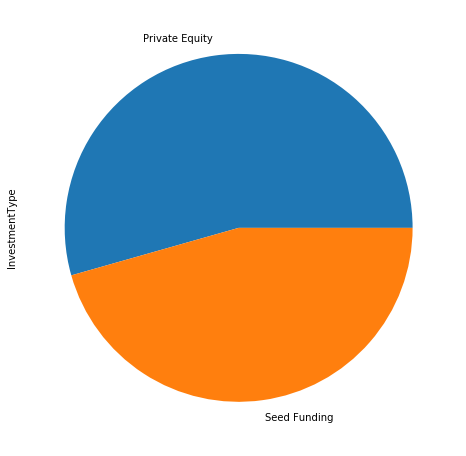

In [453]:
plt.figure(figsize=(15,8))
sizes.plot(kind = 'pie')